In [23]:
# Load requirements
from sklearn.datasets import load_iris
import pandas as pd
import swat
import matplotlib.pyplot as plt

Prepare the Data

In [37]:
# Load Dataset, form as dataframe, give column names
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data[0:10]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [38]:
target = pd.DataFrame(iris.target)
target = target.rename(columns = {0: 'target'})
target.head()
df = pd.concat([data, target], axis = 1)
df[0:10]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [39]:
# Establish the Viya Connection
conn = swat.CAS("10.96.8.225", 8777, username = "sasdemo", password = "Orion123", protocol="http")

In [40]:
# Push the IRIS table to a shared repository
conn.dropTable(name = "IRIS", caslib = "public", quiet = "TRUE")
conn.upload_frame(df, casout=dict(caslib = "PUBLIC", name = "IRIS", promote = 'true'))

NOTE: Cloud Analytic Services made the uploaded file available as table IRIS in caslib PUBLIC.
NOTE: The table IRIS has been created in caslib PUBLIC from binary data uploaded to Cloud Analytic Services.


CASTable('IRIS', caslib='PUBLIC')

Explore and Analyze the data

In [14]:
# Fetch the formatted data
sas_iris = pd.DataFrame(conn.table.fetch(to = 500, table={"caslib":"public", "name":"formatted_iris"})["Fetch"])

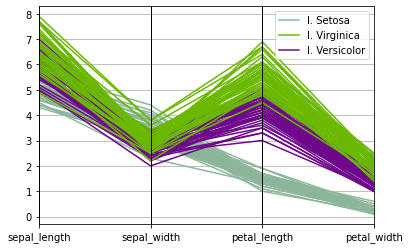

In [35]:
# Create parallel coordinates plot
from pandas.plotting import parallel_coordinates
parallel_coordinates(sas_iris.drop("target", axis=1), "species")

# Save the plot
os.chdir("C:\\Users\\frbrit\\Documents")
plt.savefig("parallel_plot.png")

C:\Users\frbrit\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\misc.py:147: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])


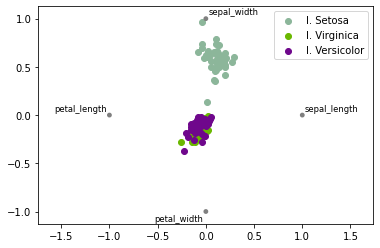

In [36]:
# Create radial plot
from pandas.plotting import radviz
radviz(sas_iris.drop("target", axis=1), "species")

# Save the plot
os.chdir("C:\\Users\\frbrit\\Documents")
plt.savefig("radial_plot.png")

In [27]:
os.chdir("C:\\Users\\frbrit\\Documents")

'c:\\Users\\frbrit\\Documents\\SAS\\SE Work\\VA\\VINCI SPyRG'